In [2]:
import numpy as np
import math
import struct
import sys
import os
import pymses
from pymses.filters import CellsToPoints
from pymses.utils import constants as C

#### Calculate sinkpos

In [3]:
import pandas as pd

# outpath =  "/drf/projets/capucine.new/mcarpine/RamsesMaxime/TestConvert/"
# datapath = '/drf/projets/alfven-data/ml279579/collapses/dust_growth/coala/low_rot/10bins/mach_1/B335_all_source_scut2/'
# num = 13
outpath =  "/drf/projets/capucine.new/mcarpine/RamsesMaxime/Test40bins/"
datapath = '/drf/projets/alfven-data/ml279579/collapses/dust_growth/coala/low_rot/40bins_pymses/B335_all_source_scut11/'
num = 100


filename = datapath+"output_"+str(num).zfill(5)
folder = datapath
# in pc, relative to corner of sim
df = pd.read_csv(filename+"/sink_"+str(num).zfill(5)+".csv",header=None)
pos = df.iloc[:,3:6].to_numpy()
snap = pymses.RamsesOutput(folder,num)
boxlen = snap.info['boxlen']

starpos = (pos - boxlen/2)*3.086e+16
starpos = starpos[0]
# starpos = [-1.59024056e+14,  7.62432961e+13, -1.65104489e+14]
print(starpos)

  -> Found 12 namelist files (*.nml)
/drf/projets/alfven-data/ml279579/collapses/dust_growth/coala/low_rot/40bins_pymses/B335_all_source_scut11/output_00100/hydro_file_descriptor.txt
  -> Checking endianness for output #100...
  -> Computing hilbert minimal domain description for output #100...
[-1.14681407e+14  6.03854180e+13 -1.22788968e+14]


#### Conversion ramses 2 polaris

In [3]:
sys.path.append(os.path.abspath("/drf/projets/capucine.new/mcarpine/RamsesMaxime"))
import converter_ramses as conv_pol

# (np.array([7.9414097559E-02,    8.7052647954E-02,    7.9216680912E-02]) - 0.169154432522779E+00/2)*3.08e16
# For the data 13 from last maxime sim (convertible)
#starpos = [-1.59024056e+14,  7.62432961e+13, -1.65104489e+14]


outpath =  "/drf/projets/capucine.new/mcarpine/RamsesMaxime/Test40bins/"
conv_pol.convert_ramses2polaris(datapath, num, outpath, starpos,size_hole_au=40) #only 4 cells emptied ? Weird...

input: /drf/projets/alfven-data/ml279579/collapses/dust_growth/coala/low_rot/40bins_pymses/B335_all_source_scut11/output_00100
output: /drf/projets/capucine.new/mcarpine/RamsesMaxime/Test40bins/ramses_grid_00100.dat
Loading RAMSES data from: 
 /drf/projets/alfven-data/ml279579/collapses/dust_growth/coala/low_rot/40bins_pymses/B335_all_source_scut11/output_00100 


/drf/projets/alfven-data/ml279579/collapses/dust_growth/coala/low_rot/40bins_pymses/B335_all_source_scut11/output_00100


folder:  /drf/projets/alfven-data/ml279579/collapses/dust_growth/coala/low_rot/40bins_pymses/B335_all_source_scut11/ 100 


  -> Found 12 namelist files (*.nml)
/drf/projets/alfven-data/ml279579/collapses/dust_growth/coala/low_rot/40bins_pymses/B335_all_source_scut11/output_00100/hydro_file_descriptor.txt
  -> Checking endianness for output #100...
  -> Computing hilbert minimal domain description for output #100...
{'ncpu': 128, 'ndim': 3, 'levelmin': 5, 'levelmax': 13, 'ngridmax': 200000, 'nstep_coarse':

#### Writing the dust lines for the polaris cmd file

In [4]:
# To write polaris cmd file
ndust = 40
sgrid = np.logspace(np.log10(5e-7),0,ndust+1)*1e-2 # in cm so *1e-2 to convert to m !!

for i in range(ndust):
    print(fr'<dust_component id = "{i}"> "/drf/projets/capucine.new/mcarpine/ReviewRadiativeTransferThemis2/Polaris/Dust/silicate_oblate.dat" 0.625 0 {sgrid[i]} {sgrid[i+1]}')
    print(fr'<dust_component id = "{i}"> "/drf/projets/capucine.new/mcarpine/ReviewRadiativeTransferThemis2/Polaris/Dust/graphite_oblate.dat" 0.375 0 {sgrid[i]} {sgrid[i+1]}')
    print('')



<dust_component id = "0"> "/drf/projets/capucine.new/mcarpine/ReviewRadiativeTransferThemis2/Polaris/Dust/silicate_oblate.dat" 0.625 0 5e-09 7.186141329931217e-09
<dust_component id = "0"> "/drf/projets/capucine.new/mcarpine/ReviewRadiativeTransferThemis2/Polaris/Dust/graphite_oblate.dat" 0.375 0 5e-09 7.186141329931217e-09

<dust_component id = "1"> "/drf/projets/capucine.new/mcarpine/ReviewRadiativeTransferThemis2/Polaris/Dust/silicate_oblate.dat" 0.625 0 7.186141329931217e-09 1.0328125442749141e-08
<dust_component id = "1"> "/drf/projets/capucine.new/mcarpine/ReviewRadiativeTransferThemis2/Polaris/Dust/graphite_oblate.dat" 0.375 0 7.186141329931217e-09 1.0328125442749141e-08

<dust_component id = "2"> "/drf/projets/capucine.new/mcarpine/ReviewRadiativeTransferThemis2/Polaris/Dust/silicate_oblate.dat" 0.625 0 1.0328125442749141e-08 1.4843873820970752e-08
<dust_component id = "2"> "/drf/projets/capucine.new/mcarpine/ReviewRadiativeTransferThemis2/Polaris/Dust/graphite_oblate.dat" 0.37

#### Test for reading Maxime ramses with pymses

In [40]:
# load Ramses data
# 40 dust size bins from Maxime (not working, 176 variables)
filename = "/drf/projets/capucine.new/mcarpine/RamsesMaxime/output_00100/"

# 20 dust size bins from Maxime - to test
filename = '/drf/projets/alfven-data/ml279579/collapses/dust_growth/coala/low_rot/10bins/mach_1/B335_all_source_scut2/output_00001/'

# Patrick simulation (working)
#filename = "/drf/projets/capucine.new/mcarpine/ReviewPolarisvsRadMC/RadMC/DC_1/output_00080/"

# Ugo simu
#filename = '/drf/projets/alfven-data/ul264359/collapses/EXPLORATION_HR/DC_2_HR/output_00083/'



"""written by Valeska Valdivia"""
#Filename will be the format my/folder/here/output_?????
#where ????? is from 00001 to 99999
print(filename)

# Split the filename into folder and number (pymses needs this)
outstr = "output_"
outloc = filename.rfind(outstr)
folder = filename[:outloc]
numloc = outloc+len(outstr)

# Note: 5 characters in output number
num = int(filename[numloc:numloc+5])
# Create the pymses RamsesOutput object 
print("\n\nfolder: ", folder , num, "\n\n")
snap = pymses.RamsesOutput(folder,num)

# Create a flat structure with the snapshot's cell data in it
print(snap.info)

amr = snap.amr_source(["rho","P","vel","Br","Bl","DR_1"])
#amr = snap.amr_source(["rho"])
print(amr)
#amr = snap.amr_source(["rho","P","vel"])
cell_source = CellsToPoints(amr)
cells = cell_source.flatten()
print("The B fields", cells["Br"],cells["Bl"],"end")




/drf/projets/alfven-data/ml279579/collapses/dust_growth/coala/low_rot/10bins/mach_1/B335_all_source_scut2/output_00001/


folder:  /drf/projets/alfven-data/ml279579/collapses/dust_growth/coala/low_rot/10bins/mach_1/B335_all_source_scut2/ 1 


  -> Found 15 namelist files (*.nml)
/drf/projets/alfven-data/ml279579/collapses/dust_growth/coala/low_rot/10bins/mach_1/B335_all_source_scut2/output_00001/hydro_file_descriptor.txt
  -> Checking endianness for output #1...
  -> Computing hilbert minimal domain description for output #1...
{'ncpu': 128, 'ndim': 3, 'levelmin': 5, 'levelmax': 13, 'ngridmax': 200000, 'nstep_coarse': 0, 'boxlen': 0.169154432522779, 'time': 0.0, 'aexp': 1.0, 'H0': 1.0, 'omega_m': 1.0, 'omega_l': 0.0, 'omega_k': 0.0, 'omega_b': 0.045, 'unit_length': (5209956521701593.0 m), 'unit_density': (3.8346e-21 m^-3.kg), 'unit_time': (1977320409468800.0 s), 'mu_gas': 2.31, 'ngrp': 0, 'nent': 0, 'npscal': 14, 'nextinct': 0, 'ndust': 10, 'ordering': 'hilbert', 'ir_cloud': 4, 'eos': 

KeyboardInterrupt: 

#### To add to pymsesrc before doing the conversion so pymses knows what new fields there are to read

In [6]:
# To write the pymsesrc file lines to add.

for i in range(11,51):
    print(f'            {{"__type__": "scalar_field", "__file_type__": "hydro", "name": "DR_{i-10}", "ivar": {i}}},')

            {"__type__": "scalar_field", "__file_type__": "hydro", "name": "DR_1", "ivar": 11},
            {"__type__": "scalar_field", "__file_type__": "hydro", "name": "DR_2", "ivar": 12},
            {"__type__": "scalar_field", "__file_type__": "hydro", "name": "DR_3", "ivar": 13},
            {"__type__": "scalar_field", "__file_type__": "hydro", "name": "DR_4", "ivar": 14},
            {"__type__": "scalar_field", "__file_type__": "hydro", "name": "DR_5", "ivar": 15},
            {"__type__": "scalar_field", "__file_type__": "hydro", "name": "DR_6", "ivar": 16},
            {"__type__": "scalar_field", "__file_type__": "hydro", "name": "DR_7", "ivar": 17},
            {"__type__": "scalar_field", "__file_type__": "hydro", "name": "DR_8", "ivar": 18},
            {"__type__": "scalar_field", "__file_type__": "hydro", "name": "DR_9", "ivar": 19},
            {"__type__": "scalar_field", "__file_type__": "hydro", "name": "DR_10", "ivar": 20},
            {"__type__": "scalar_field"

#### To check reading of hydro file descriptor

In [24]:
# To check reading of hydro file descriptor
import re
import os
import sys

hfd_fname = '/drf/projets/capucine.new/mcarpine/RamsesMaxime/output_00100/hydro_file_descriptor.txt'

# read hydro descriptor file
with open(hfd_fname, "r") as f:
    lines = f.readlines()

# parsing hydro_file
if "version" in lines[0]:
    # new hydro file descriptor format
    for tmp in lines:
        if not "#" in tmp:
            bl = tmp.replace(" ", "").replace("\n", "").split(",")
            self._hydro_fields_description[bl[1]] = int(bl[0]) - 1
else:
    # Old format
    for tmp in lines:
        if not "nvar" in tmp:
            tmp = tmp.replace("\n", "").replace(" ", "")
            var_id = re.findall(r'\b\d+\b', tmp)
            var_name = tmp.split(":")[1].replace(" ", "").replace("\n", "")
            #self._hydro_fields_description[var_name] = int(var_id[0]) - 1
            print(int(var_id[0]) - 1)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


IndexError: list index out of range

#### To correct file hydro file descriptor if more than 100 variable are in it (unexpected now that Maxime took the velocities out of the output)

In [33]:
# To correct file hydro file descriptor.

for i in range(100,177):
    lines[i] = lines[i].replace('**',f'{i}')

with open(hfd_fname, "w") as f:
    f.writelines(lines)

In [43]:
datapath+"output_"+str(num).zfill(5)+"/sink_"+str(num).zfill(5)+".csv"

'/drf/projets/alfven-data/ml279579/collapses/dust_growth/coala/low_rot/10bins/mach_1/B335_all_source_scut2/output_00001/sink_00001.csv'

### Plots

In [4]:
import subprocess
from matplotlib.colors import LogNorm
import numpy as np
%matplotlib widget

In [5]:
import sys
import os
sys.path.append(os.path.abspath("/drf/projets/capucine.new/mcarpine/RADMC"))
import Convertions as co 
import matplotlib.pyplot as plt
from matplotlib import cm
from radmc3dPy import *
from astropy.io import fits
from scipy import ndimage
from scipy import interpolate


waves = np.array([0.829,1.3,3]) #mm

h = 6.62607015e-34
c = 299792458
kb = 1.380649e-23


def planck_freq(wav, T):
    h = 6.62607015e-34
    c = 299792458
    kb = 1.380649e-23
    freq = c/wav
    a = 2.0*h*freq**3/c**2
    b = h*freq/(kb*T)
    intensity = a/ ((np.exp(b) - 1.0) )
    return intensity


In [6]:
def fitstoimage_Polaris(fitspath,centered=True): # TO read POLARIS files - The 0,0,0 of the grid is not at the center of the image and requires to read the header values
    
    with fits.open(fitspath) as hdu: 
        imdata = hdu[0].data
        header = hdu[0].header
        #print(len(hdu))
    nx , ny = np.shape(imdata[0][0])
    image = np.zeros((nx,ny))
    for i in range(nx):
            for j in range(ny):
                image[i,j] = imdata[0,0,i,j]

    x0 = header['CRVAL1B']
    px0 = header['CRPIX1B']
    dx = header['CDELT1B']
    ux = header['CUNIT1B']
    y0 = header['CRVAL2B']
    py0 = header['CRPIX2B']
    dy = header['CDELT2B']
    uy = header['CUNIT2B']

    size_im = [nx*dx,ny*dy] #in au
    
    x = np.linspace(x0-(px0-1)*dx,x0-(px0-1)*dx + (nx-1)*dx,nx)
    y = np.linspace(y0-(py0-1)*dy,y0-(py0-1)*dy + (ny-1)*dy,nx)
    xi, xf = x0-(px0-1)*dx - dx/2 , x0-(px0-1)*dx + (nx-1)*dx + dx/2 #left of the first px and right of the last px
    yi, yf = y0-(py0-1)*dy - dy/2 , y0-(py0-1)*dy + (ny-1)*dy + dy/2 #bottom of the first px and top of the last px
    
    im_polaris_centered = ndimage.shift(image,[nx/2+xi/dx,ny/2+yi/dy],mode='nearest')
    print([nx/2+xi/dx,ny/2+yi/dy])
    #Why the nx/2 ? because xi is coordinate, so negative
    
    if centered :
        #return im_polaris_centered[nx//4:-nx//4,ny//4:-ny//4],xi,yi,xf,yf,dx,dy
        return im_polaris_centered,xi,yi,xf,yf,dx,dy,size_im
    #return image[nx//4:-nx//4,ny//4:-ny//4],xi,yi,xf,yf,dx,dy
    return image,xi,yi,xf,yf,dx,dy,size_im


def fitstoimages_Polaris(fitspath,centered=True): # TO read POLARIS files - The 0,0,0 of the grid is not at the center of the image and requires to read the header values
    images = ()
    for w in range(1,4):
        im,_,_,_,_,_,_,size_im = fitstoimage_Polaris(fitspath+f'polaris_detector_nr000{w}.fits',centered=centered)
        images += (im,)
    return images,size_im

In [7]:
def fitstoimage_radMC(fitspath): # for RadMC - The 0,0,0 of the grid is at the center of the image
    with fits.open(fitspath) as hdu: 
        imdata = hdu[0].data
        header = hdu[0].header
    return imdata[:,300:-300,300:-300]

def beta(images):
    beta = ()
    for w in range(2):
        beta += (np.log10(images[w+1]/images[w])/np.log10(waves[w]/waves[w+1]) - 2 ,)
    return beta

def beta_temp(images,temp,size_im,size_T):
    beta = ()

    nx1 = temp.shape[1]
    ny1 = temp.shape[0]
    dx1 = size_T[0]/nx1
    dy1 = size_T[1]/ny1

    
    nx2 = images[0].shape[1]
    ny2 = images[0].shape[0]
    dx2 = size_im[0]/nx2
    dy2 = size_im[1]/ny2
    
    # ATTENTION A INTERPOLER AU MILIEU ET PAS AU COIN !!!!
    
    x1 = np.linspace(-size_T[0]/2 + dx1/2, size_T[0]/2-dx1/2, nx1)
    y1 = np.linspace(-size_T[1]/2 + dy1/2, size_T[1]/2-dy1/2, ny1)
    f1 = interpolate.interp2d(y1, x1, temp, kind='cubic')
    
    x2 = np.linspace(-size_im[0]/2 + dx2/2, size_im[0]/2-dx2/2, nx2)
    y2 = np.linspace(-size_im[1]/2 + dy2/2, size_im[1]/2-dy2/2, ny2)
    
    dx = dx2
    dy = dy2
    sx = size_im[0]
    sy = size_im[1]
    nx = nx2
    ny = ny2
    
    x = np.linspace(-sx/2 + dx/2, sx/2-dx/2, nx) #we take the smaller picture and smaller pixel.
    y = np.linspace(-sy/2 + dy/2, sy/2-dy/2, ny)
    
    T = f1(y, x)
    
    # x = np.linspace(0, 1, temp.shape[0])
    # y = np.linspace(0, 1, temp.shape[1])
    # f = interpolate.interp2d(y, x, temp, kind='cubic')
    
    # x2 = np.linspace(0, 1, images[0].shape[0])
    # y2 = np.linspace(0, 1, images[0].shape[1])
    # T = f(y2, x2)
    
    # print(temp.shape) # (768, 1024)
    # print(T.shape) # (1000, 1600)

    #w=1
    # plt.figure()
    # plt.imshow(T)
    # plt.show()
    # plt.figure()
    # plt.imshow(temp)
    # plt.show()
    # plt.figure()
    # plt.imshow(np.log10(planck_freq(waves[w+1]*1e-3, T)/planck_freq(waves[w]*1e-3, T))/np.log10(waves[w]/waves[w+1]))
    # plt.show()

    for w in range(2):
        beta += (np.log10(images[w+1]/images[w])/np.log10(waves[w]/waves[w+1]) - np.log10(planck_freq(waves[w+1]*1e-3, T)/planck_freq(waves[w]*1e-3, T))/np.log10(waves[w]/waves[w+1]) ,)
    return beta

def beta_planck(images,plancks,size_im,size_pl):
    beta = ()

    P=()
    im = ()
    for planck,image in zip(plancks,images):

        nx1 = planck.shape[1]
        ny1 = planck.shape[0]
        dx1 = size_pl[0]/nx1
        dy1 = size_pl[1]/ny1

        
        nx2 = images[0].shape[1]
        ny2 = images[0].shape[0]
        dx2 = size_im[0]/nx2
        dy2 = size_im[1]/ny2
        
        # ATTENTION A INTERPOLER AU MILIEU ET PAS AU COIN !!!!
        
        x1 = np.linspace(-size_pl[0]/2 + dx1/2, size_pl[0]/2-dx1/2, nx1)
        y1 = np.linspace(-size_pl[1]/2 + dy1/2, size_pl[1]/2-dy1/2, ny1)
        f1 = interpolate.interp2d(y1, x1, planck, kind='cubic')
        
        x2 = np.linspace(-size_im[0]/2 + dx2/2, size_im[0]/2-dx2/2, nx2)
        y2 = np.linspace(-size_im[1]/2 + dy2/2, size_im[1]/2-dy2/2, ny2)
        f2 = interpolate.interp2d(y2, x2, image, kind='cubic')

        
        # dx = min([dx1,dx2])
        # dy = min([dy1,dy2])
        # sx = min([size_pl[0],size_im[0]])
        # sy = min([size_pl[1],size_im[1]])

        dx = dx2
        dy = dy2
        sx = size_im[0]
        sy = size_im[1]
        nx = nx2
        ny = ny2

        
        x = np.linspace(-sx/2 + dx/2, sx/2-dx/2, nx) #we take the smaller picture and smaller pixel.
        y = np.linspace(-sy/2 + dy/2, sy/2-dy/2, ny)
        
        P += (f1(y, x),)
        im += (f2(y, x),)
    
    # print(planck.shape) # (768, 1024)
    # print(P.shape) # (1000, 1600)

    #w=1
    # plt.figure()
    # plt.imshow(T)
    # plt.show()
    # plt.figure()
    # plt.imshow(temp)
    # plt.show()
    # plt.figure()
    # plt.imshow(np.log10(planck_freq(waves[w+1]*1e-3, T)/planck_freq(waves[w]*1e-3, T))/np.log10(waves[w]/waves[w+1]))
    # plt.show()

    for w in range(2):
        beta += (np.log10(images[w+1]/images[w])/np.log10(waves[w]/waves[w+1]) - np.log10(P[w+1]/P[w])/np.log10(waves[w]/waves[w+1]) ,)
    return beta

In [8]:
def temp_fitstoimage_radMC(path):
    n_info = np.loadtxt(path+'dust_temperature_subbox.out',skiprows=1,max_rows=1)
    print(n_info)
    nx,ny,nz,nv = np.int64(n_info)
    grid_sub = np.loadtxt(path+'dust_temperature_subbox.out',skiprows=7)
    grid = np.zeros((nx, ny, nz, nv))
    
    for i_z in range(nz):
        for i_y in range(ny):
            for i_x in range(nx):
                for i_v in range(nv):
                    grid[i_x,i_y,i_z,i_v] = grid_sub[nx*ny*nz*i_v + ny*nx*i_z + nx*i_y + i_x]
                # at the end of this nested loop, the index will be ny*nx*(nz-1) + nx*(ny-1) + nx-1 = nx*ny*nz - 1
    return grid

def dens_fitstoimage_radMC(path):
    n_info = np.loadtxt(path+'dust_density_subbox.out',skiprows=1,max_rows=1)
    print(n_info)
    nx,ny,nz,nv = np.int64(n_info)
    grid_sub = np.loadtxt(path+'dust_density_subbox.out',skiprows=7)
    grid = np.zeros((nx, ny, nz, nv))
    
    for i_z in range(nz):
        for i_y in range(ny):
            for i_x in range(nx):
                for i_v in range(nv):
                    grid[i_x,i_y,i_z,i_v] = grid_sub[nx*ny*nz*i_v + ny*nx*i_z + nx*i_y + i_x]
                # at the end of this nested loop, the index will be ny*nx*(nz-1) + nx*(ny-1) + nx-1 = nx*ny*nz - 1
    return grid



In [21]:
def temp_fitstoimage_Polaris(path,centered=True,_3D = False):
    with fits.open(path) as hdu: 
        imdata = hdu[0].data
        header = hdu[0].header
        #print(len(hdu))

    #Find the index of dust temp and dens
    if 'dust_temperature [K]' in list(header.values()):
        i_dst_temp = int(list(header.keys())[list(header.values()).index('dust_temperature [K]')][8:])-1
    else :
        i_dst_temp = int(list(header.keys())[list(header.values()).index('average_dust_temperature [K]')][8:])-1
    
    if _3D:
        nz, nx , ny = np.shape(imdata[0])
        image = np.zeros((nx,ny,nz))
        for i in range(nx):
                for j in range(ny):
                    for k in range(nz):
                        image[i,j,k] = imdata[i_dst_temp,k,i,j] 
    else:
        nx , ny = np.shape(imdata[0][0])
        image = np.zeros((nx,ny))
        for i in range(nx):
                for j in range(ny):
                    image[i,j] = imdata[i_dst_temp,1,i,j] #1 bc 2nd plane is xz
    
    x0 = header['CRVAL1B']
    px0 = header['CRPIX1B']
    dx = header['CDELT1B']
    ux = header['CUNIT1B']
    y0 = header['CRVAL2B']
    py0 = header['CRPIX2B']
    dy = header['CDELT2B']
    uy = header['CUNIT2B']
    
    if _3D:
        z0 = header['CRVAL3B']
        pz0 = header['CRPIX3B']
        dz = header['CDELT3B']
        uz = header['CUNIT3B']
        size_im = [nx*dx,ny*dy,nz*dz] #in au
    else:
        size_im = [nx*dx,ny*dy] #in au
    
    x = np.linspace(x0-(px0-1)*dx,x0-(px0-1)*dx + (nx-1)*dx,nx)
    y = np.linspace(y0-(py0-1)*dy,y0-(py0-1)*dy + (ny-1)*dy,nx)
    xi, xf = x0-(px0-1)*dx - dx/2 , x0-(px0-1)*dx + (nx-1)*dx + dx/2 #left of the first px and right of the last px
    yi, yf = y0-(py0-1)*dy - dy/2 , y0-(py0-1)*dy + (ny-1)*dy + dy/2 #bottom of the first px and top of the last px

    
    if _3D:
        shift_to_apply = [nx/2+xi/dx,ny/2+yi/dy,0]
    else:
        shift_to_apply = [nx/2+xi/dx,ny/2+yi/dy]
    im_polaris_centered = ndimage.shift(image,shift_to_apply,mode='nearest')
    print([nx/2+xi/dx,ny/2+yi/dy])
    
    if centered :
        #return im_polaris_centered[nx//4:-nx//4,ny//4:-ny//4],xi,yi,xf,yf,dx,dy,size_im
        return im_polaris_centered,xi,yi,xf,yf,dx,dy,size_im
    #return image[nx//4:-nx//4,ny//4:-ny//4],xi,yi,xf,yf,dx,dy,size_im
    return image,xi,yi,xf,yf,dx,dy,size_im

def planck_fitstoimage_Polaris(path,waves,centered=True):
    images = ()
    with fits.open(path) as hdu: 
        imdata = hdu[0].data
        header = hdu[0].header
        #print(len(hdu))

    #Find the index of dust temp and dens
    if 'dust_temperature [K]' in list(header.values()):
        i_dst_temp = int(list(header.keys())[list(header.values()).index('dust_temperature [K]')][8:])-1
    else :
        i_dst_temp = int(list(header.keys())[list(header.values()).index('average_dust_temperature [K]')][8:])-1
    i_dens = int(list(header.keys())[list(header.values()).index('gas_number_density [m^-3]')][8:])-1

    nz, nx , ny = np.shape(imdata[0])
    temp = np.zeros((nx,ny,nz))
    dens = np.zeros((nx,ny,nz))
    for i in range(nx):
            for j in range(ny):
                for k in range(nz):
                    temp[i,j,k] = imdata[i_dst_temp,k,i,j] #2 bc 3rd data is dust temp, 1 bc 2nd plane is xz
                    dens[i,j,k] = imdata[i_dens,k,i,j] #2 bc 3rd data is dust temp, 1 bc 2nd plane is xz

    
    
    x0 = header['CRVAL1B']
    px0 = header['CRPIX1B']
    dx = header['CDELT1B']
    ux = header['CUNIT1B']
    y0 = header['CRVAL2B']
    py0 = header['CRPIX2B']
    dy = header['CDELT2B']
    uy = header['CUNIT2B']
    z0 = header['CRVAL3B']
    pz0 = header['CRPIX3B']
    dz = header['CDELT3B']
    uz = header['CUNIT3B']

    
    size_im = [nx*dx,ny*dy,nz*dz] #in au
    
    x = np.linspace(x0-(px0-1)*dx,x0-(px0-1)*dx + (nx-1)*dx,nx)
    y = np.linspace(y0-(py0-1)*dy,y0-(py0-1)*dy + (ny-1)*dy,nx)
    xi, xf = x0-(px0-1)*dx - dx/2 , x0-(px0-1)*dx + (nx-1)*dx + dx/2 #left of the first px and right of the last px
    yi, yf = y0-(py0-1)*dy - dy/2 , y0-(py0-1)*dy + (ny-1)*dy + dy/2 #bottom of the first px and top of the last px
        
    for wav in waves : 
        image = np.average(planck_freq(wav,temp),weights = dens, axis = 2)
        
        im_polaris_centered = ndimage.shift(image,[nx/2+xi/dx,ny/2+yi/dy],mode='nearest')
        if centered :
            #images += (im_polaris_centered[nx//4:-nx//4,ny//4:-ny//4],)
            images += (im_polaris_centered,)
        else:
            #images += (image[nx//4:-nx//4,ny//4:-ny//4],)
            images += (image,)
    return images, size_im


def dens_fitstoimage_Polaris(path,centered=True,_3D = False):
    with fits.open(path) as hdu: 
        imdata = hdu[0].data
        header = hdu[0].header
        #print(len(hdu
    
    i_dens = int(list(header.keys())[list(header.values()).index('gas_number_density [m^-3]')][8:])-1


    if _3D:
        nz, nx , ny = np.shape(imdata[0])
        image = np.zeros((nx,ny,nz))
        for i in range(nx):
                for j in range(ny):
                    for k in range(nz):
                        image[i,j,k] = imdata[i_dens,k,i,j]*2.31*1.660531e-27*0.005385523*1e-3 # We convert to dust g/cm3 #0 bc 1st data is gas number dens, 1 bc 2nd plane is xz
     
    else:
        nx , ny = np.shape(imdata[0][0])
        image = np.zeros((nx,ny))
        for i in range(nx):
                for j in range(ny):
                    image[i,j] = imdata[i_dens,1,i,j]*2.31*1.660531e-27*0.005385523*1e-3 # We convert to dust g/cm3 #0 bc 1st data is gas number dens, 1 bc 2nd plane is xz
    
    
    
    x0 = header['CRVAL1B']
    px0 = header['CRPIX1B']
    dx = header['CDELT1B']
    ux = header['CUNIT1B']
    y0 = header['CRVAL2B']
    py0 = header['CRPIX2B']
    dy = header['CDELT2B']
    uy = header['CUNIT2B']
    if _3D:
        z0 = header['CRVAL3B']
        pz0 = header['CRPIX3B']
        dz = header['CDELT3B']
        uz = header['CUNIT3B']
        size_im = [nx*dx,ny*dy,nz*dz] #in au
    else:
        size_im = [nx*dx,ny*dy] #in au
    

    
    size_im = [nx*dx,ny*dy,nz*dz] #in au
    
    x = np.linspace(x0-(px0-1)*dx,x0-(px0-1)*dx + (nx-1)*dx,nx)
    y = np.linspace(y0-(py0-1)*dy,y0-(py0-1)*dy + (ny-1)*dy,nx)
    xi, xf = x0-(px0-1)*dx - dx/2 , x0-(px0-1)*dx + (nx-1)*dx + dx/2 #left of the first px and right of the last px
    yi, yf = y0-(py0-1)*dy - dy/2 , y0-(py0-1)*dy + (ny-1)*dy + dy/2 #bottom of the first px and top of the last px

    if _3D:
        shift_to_apply = [nx/2+xi/dx,ny/2+yi/dy,0]
    else:
        shift_to_apply = [nx/2+xi/dx,ny/2+yi/dy]
    im_polaris_centered = ndimage.shift(image,shift_to_apply,mode='nearest')
    print([nx/2+xi/dx,ny/2+yi/dy])
    
    # if centered :
    #     return im_polaris_centered[nx//4:-nx//4,ny//4:-ny//4],xi,yi,xf,yf,dx,dy,size_im
    # return image[nx//4:-nx//4,ny//4:-ny//4],xi,yi,xf,yf,dx,dy,size_im
    if centered :
        return im_polaris_centered,xi,yi,xf,yf,dx,dy,size_im
    return image,xi,yi,xf,yf,dx,dy,size_im

In [10]:
def plotmap(im,px_au,ax = None,cbon = True,axes = None, xlabel = True, ylabel = True,title = '',vmin=None,vmax=None,norm=LogNorm()):
    nx,ny = im.shape
    if ax == None:
        plt.figure()
        ax = plt.gca()
        axes = [ax]
    img= ax.imshow(im, norm = norm, cmap = 'magma',origin ='lower', extent=[-nx//2*px_au,nx//2*px_au,-ny//2*px_au,ny//2*px_au])
    if xlabel:
        ax.set_xlabel('x (au)')
    if ylabel:
        ax.set_ylabel('z (au)')
    if cbon :
        clrbr = plt.colorbar(img, ax=axes, orientation='vertical',location='right')
    ax.set_title(title)
    if vmin is not None and vmax is not None:
        img.set_clim(vmin,vmax)
    return img

def compute_avg_r(beta,px_au,xcenter=0,ycenter=0):
    # xcenter, ycenter in pixel units from center 
    nx = beta.shape[0]
    ny = beta.shape[1]
    x = np.linspace(1,nx,nx)
    y = np.linspace(1,ny,ny)
    X_mesh, Y_mesh = np.meshgrid(x,y)
    x0 = nx/2 + xcenter
    y0 = ny/2 + ycenter
    R = np.sqrt((X_mesh-x0)**2+(Y_mesh-y0)**2)
    
    nr = min(nx,ny)//2
    betar = np.zeros(nr-1)
    sig_betar = np.zeros(nr-1)
    for r in range(nr-1):
        betar[r] = np.mean(beta[np.logical_and(R>=r,R<r+1)])
        sig_betar[r] = np.std(beta[np.logical_and(R>=r,R<r+1)])
    
    r = np.linspace(0,(nr-1)*px_au,nr-1)

    return betar,r,sig_betar

def compute_avg_r_3d(beta,px_au,xcenter=0,ycenter=0,zcenter=0):
    # xcenter, ycenter in pixel units from center 
    nx = beta.shape[0]
    ny = beta.shape[1]
    nz = beta.shape[2]
    x = np.linspace(1,nx,nx)
    y = np.linspace(1,ny,ny)
    z = np.linspace(1,nz,nz)
    X_mesh, Y_mesh, Z_mesh = np.meshgrid(x,y,z)
    x0 = nx/2 + xcenter
    y0 = ny/2 + ycenter
    z0 = nz/2 + zcenter
    R = np.sqrt((X_mesh-x0)**2+(Y_mesh-y0)**2+(Z_mesh-z0)**2)
    
    nr = min(nx,ny,nz)//2
    betar = np.zeros(nr-1)
    sig_betar = np.zeros(nr-1)
    for r in range(nr-1):
        betar[r] = np.mean(beta[np.logical_and(R>=r,R<r+1)])
        sig_betar[r] = np.std(beta[np.logical_and(R>=r,R<r+1)])
    
    r = np.linspace(0,(nr-1)*px_au,nr-1)

    return betar,r,sig_betar
    
    

In [22]:

# im_Astrosil_Maxime, size_im_Astrosil_Maxime = fitstoimages_Polaris("/drf/projets/capucine.new/mcarpine/RamsesMaxime/TestBigHole/Astrosil/pol_PA_y/data/",centered =True)

# planck_Astrosil_Maxime,size_planck_Astrosil_Maxime = planck_fitstoimage_Polaris("/drf/projets/capucine.new/mcarpine/RamsesMaxime/TestBigHole/Astrosil/pol_PA_y/data/input_midplane_3d.fits",waves*1e-3,centered =True)

im_Astrosil_Maxime, size_im_Astrosil_Maxime = fitstoimages_Polaris("/drf/projets/capucine.new/mcarpine/RamsesMaxime/Test40bins/Astrosil/pol_PA_y/data/",centered =True)

planck_Astrosil_Maxime,size_planck_Astrosil_Maxime = planck_fitstoimage_Polaris("/drf/projets/capucine.new/mcarpine/RamsesMaxime/Test40bins/Astrosil/pol_PA_y/data/input_midplane_3d.fits",waves*1e-3,centered =True)


beta_Astrosil_Maxime = beta(im_Astrosil_Maxime)

# Attention ici : im (detector) fait 8000 au de large, alors que planck est bien plus large  (largeur de la simu, = 
planck_beta_Astrosil_Maxime = beta_planck(im_Astrosil_Maxime,planck_Astrosil_Maxime,size_im_Astrosil_Maxime,size_planck_Astrosil_Maxime)



[-6.821210263296962e-13, -6.821210263296962e-13]
[-6.821210263296962e-13, -6.821210263296962e-13]
[-6.821210263296962e-13, -6.821210263296962e-13]


/tmp/ipykernel_1003374/969694973.py:96: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  f1 = interpolate.interp2d(y1, x1, planck, kind='cubic')
/tmp/ipykernel_1003374/969694973.py:100: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator`

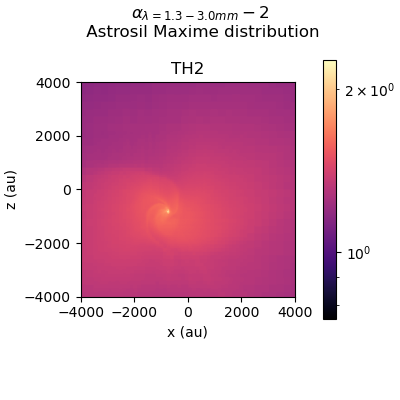

In [23]:
px_au = 5 # size of a pixel in au

w = 1

fig, axes = plt.subplots(1,1,figsize=(4,4),sharey=True,sharex=True,layout='compressed')

vmin = 1
vmax = 2#np.max([beta_logn_TH2,beta_logn_Astrosil,beta_logn_Astrodust])

im1 = plotmap(beta_Astrosil_Maxime[w],px_au,axes,cbon = True,axes = axes,title = 'TH2',norm=LogNorm())


fig.suptitle(fr"$\alpha_{{\lambda = {waves[w]}-{waves[w+1]} mm}} - 2$"+ "\n Astrosil Maxime distribution")

plt.show()

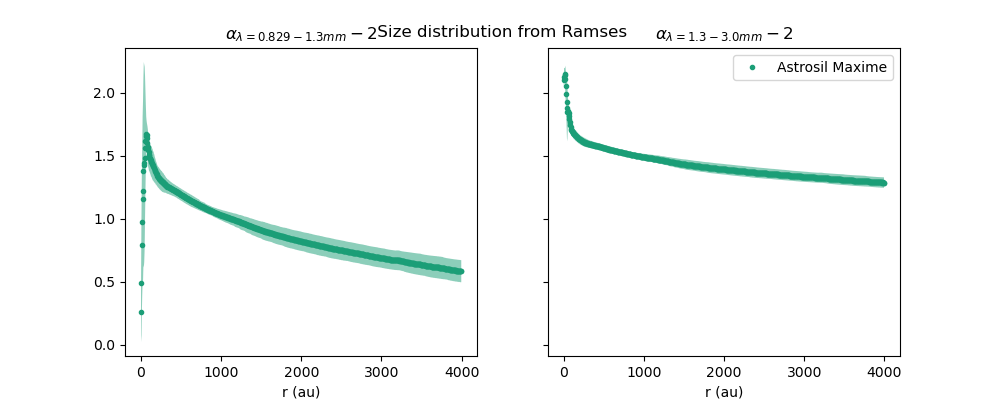

In [24]:
from cycler import cycler

px_au = 5
center = np.array(starpos)/747989353455 # in px

fig, axes = plt.subplots(1,2,sharey=True,sharex=True,figsize=(10,4))
# plt.gca().set_color_cycle('Pastel1')
# plt.set_cmap('Pastel1')
ax = axes[0]
ax.set_prop_cycle(cycler("color", plt.cm.Dark2.colors))

w=0
betar1,r1,sig_betar1= compute_avg_r(beta_Astrosil_Maxime[w],px_au,xcenter=center[0],ycenter=center[2])
  
ax.plot(r1,betar1,marker='.',linestyle = '',label ='Astrosil Maxime')
ax.fill_between(r1,betar1-sig_betar1,betar1+sig_betar1, alpha=0.5)

ax.set_xlabel("r (au)")
ax.set_title(fr"$\alpha_{{\lambda = {waves[w]}-{waves[w+1]} mm}}-2$")

ax = axes[1]
ax.set_prop_cycle(cycler("color", plt.cm.Dark2.colors))

w=1
betar1,r1,sig_betar1= compute_avg_r(beta_Astrosil_Maxime[w],px_au,xcenter=center[0],ycenter=center[2])
  
ax.plot(r1,betar1,marker='.',linestyle = '',label ='Astrosil Maxime')
ax.fill_between(r1,betar1-sig_betar1,betar1+sig_betar1, alpha=0.5)


ax.set_xlabel("r (au)")
ax.set_title(fr"$\alpha_{{\lambda = {waves[w]}-{waves[w+1]} mm}}-2$")


fig.suptitle("\n Size distribution from Ramses")


plt.legend()
plt.show()

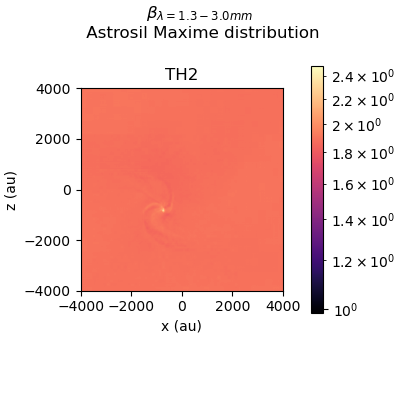

In [25]:
px_au = 5 # size of a pixel in au

w = 1

fig, axes = plt.subplots(1,1,figsize=(4,4),sharey=True,sharex=True,layout='compressed')

vmin = 1
vmax = 2#np.max([beta_logn_TH2,beta_logn_Astrosil,beta_logn_Astrodust])

im1 = plotmap(planck_beta_Astrosil_Maxime[w],px_au,axes,cbon = True,axes = axes,title = 'TH2',norm=LogNorm())


fig.suptitle(fr"$\beta_{{\lambda = {waves[w]}-{waves[w+1]} mm}}$"+ "\n Astrosil Maxime distribution")

plt.show()

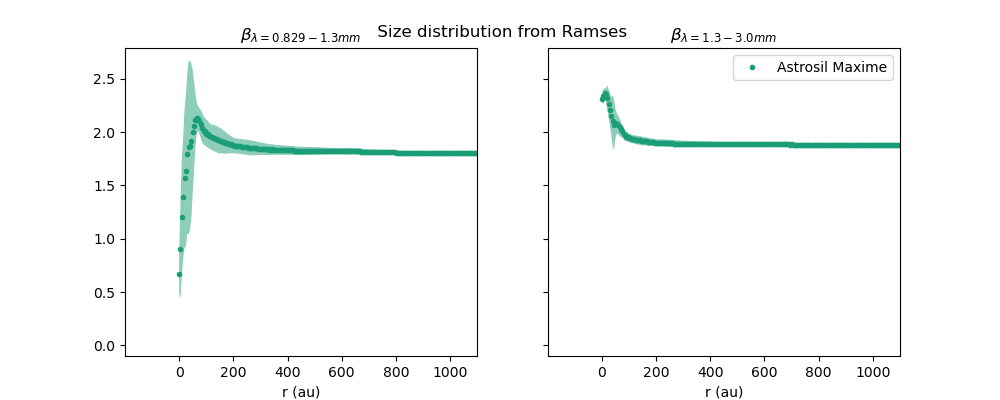

In [26]:
from cycler import cycler

px_au = 5
center = np.array(starpos)/747989353455 # in px

fig, axes = plt.subplots(1,2,sharey=True,sharex=True,figsize=(10,4))
# plt.gca().set_color_cycle('Pastel1')
# plt.set_cmap('Pastel1')
ax = axes[0]
ax.set_prop_cycle(cycler("color", plt.cm.Dark2.colors))

w=0
betar1,r1,sig_betar1= compute_avg_r(planck_beta_Astrosil_Maxime[w],px_au,xcenter=center[0],ycenter=center[2])
  
ax.plot(r1,betar1,marker='.',linestyle = '',label ='Astrosil Maxime')
ax.fill_between(r1,betar1-sig_betar1,betar1+sig_betar1, alpha=0.5)

ax.set_xlabel("r (au)")
ax.set_title(fr"$\beta_{{\lambda = {waves[w]}-{waves[w+1]} mm}}$")


ax.set_ylim(bottom = -0.1)
ax.set_xlim(right = 1100)

ax = axes[1]
ax.set_prop_cycle(cycler("color", plt.cm.Dark2.colors))

w=1
betar1,r1,sig_betar1= compute_avg_r(planck_beta_Astrosil_Maxime[w],px_au,xcenter=center[0],ycenter=center[2])
  
ax.plot(r1,betar1,marker='.',linestyle = '',label ='Astrosil Maxime')
ax.fill_between(r1,betar1-sig_betar1,betar1+sig_betar1, alpha=0.5)


ax.set_xlabel("r (au)")
ax.set_title(fr"$\beta_{{\lambda = {waves[w]}-{waves[w+1]} mm}}$")


ax.set_ylim(bottom = -0.1)
ax.set_xlim(right = 1100)

fig.suptitle("\n Size distribution from Ramses")


plt.legend()
plt.show()

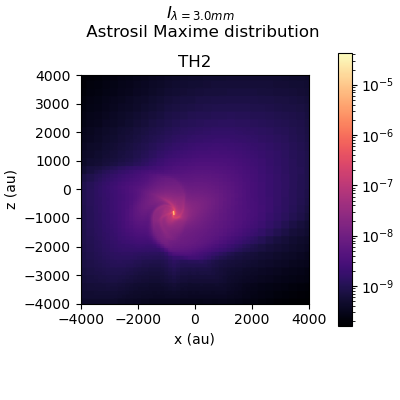

In [27]:
px_au = 5 # size of a pixel in au

w = 2

fig, axes = plt.subplots(1,1,figsize=(4,4),sharey=True,sharex=True,layout='compressed')

vmin = 1
vmax = 2#np.max([beta_logn_TH2,beta_logn_Astrosil,beta_logn_Astrodust])

im1 = plotmap(im_Astrosil_Maxime[w],px_au,axes,cbon = True,axes = axes,title = 'TH2',norm=LogNorm())


fig.suptitle(fr"$I_{{\lambda = {waves[w]} mm}}$"+ "\n Astrosil Maxime distribution")

plt.show()

[6.536993168992922e-13, 6.536993168992922e-13]


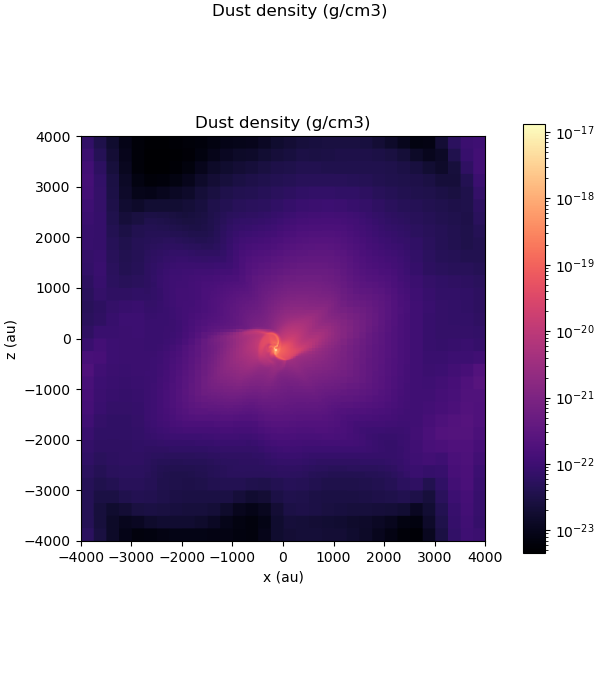

In [31]:
dens_Astrosil,_,_,_,_,_,_,size_dens_Astrosil = dens_fitstoimage_Polaris("/drf/projets/capucine.new/mcarpine/RamsesMaxime/Test40bins/Astrosil/pol_PA_y/data/input_midplane_3d.fits",centered =True,_3D=True)
# dens_AstrosilBH,_,_,_,_,_,_,size_dens_AstrosilBH = dens_fitstoimage_Polaris("/drf/projets/capucine.new/mcarpine/RamsesMaxime/TestBigHole/Astrosil/pol_PA_y/data/input_midplane_3d.fits",centered =True,_3D=True)

px_au = 8000/512 # size of a pixel in au


fig, axes = plt.subplots(1,1,figsize=(6,7),sharey=True,sharex=True,layout='compressed')

vmin = 1
vmax = 2#np.max([beta_logn_TH2,beta_logn_Astrosil,beta_logn_Astrodust])

im1 = plotmap(dens_Astrosil[:,:,26],px_au,axes,cbon = True,axes = axes,title = 'Dust density (g/cm3)',norm=LogNorm())
# im2 = plotmap(dens_logn_Astrosil,px_au,axes[1],cbon = False,axes = axes, ylabel = False,title = 'Astrosil',vmin=vmin,vmax=vmax,norm="linear")
# im3 = plotmap(dens_logn_Astrodust,px_au,axes[2],cbon = True,axes = axes, ylabel = False,title = 'Astrodust',vmin=vmin,vmax=vmax,norm="linear")


fig.suptitle(fr"Dust density (g/cm3)")
plt.show()

